# Model Evaluation: Train and Test on Split Datasets
- Split Dataset into Training set and Testing set
- Train the Model on the Training set
- Test the Model on the Testing set

### Load in iris Data

In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

### 1. Data Partition

In [2]:
# Import the module to Split the data into Training and Testing
from sklearn.model_selection import train_test_split

# Split by 40% Testing, 60% Training
# set seed with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [3]:
# Print the shapes of the Split Data
print("Original X: ", X.shape)
print("Training X: ", X_train.shape)
print("Testing X: ", X_test.shape)

print("Original y: ", y.shape)
print("Training y: ", y_train.shape)
print("Testing y: ", y_test.shape)

Original X:  (150, 4)
Training X:  (90, 4)
Testing X:  (60, 4)
Original y:  (150,)
Training y:  (90,)
Testing y:  (60,)


### 2. Train the Model on the Training Set

In [4]:
# Import the class module
from sklearn.linear_model import LogisticRegression

# Initiate the Model
logreg = LogisticRegression()

# Fit the Model on Training Set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 3. Predict on the Testing Set

In [5]:
# Predict on new testing data
y_pred = logreg.predict(X_test)

### 4. Compare to actual values

In [6]:
# Import *metrics* module to check accuracy
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.94999999999999996

- 94.9% Accuracy

## Compare to KNN with K=5

In [7]:
# Train Model on Training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on Testing data
y_pred = knn.predict(X_test)

# Check Accuracy
metrics.accuracy_score(y_test, y_pred)

0.96666666666666667

- 96.6% Accuracy

## Compare to KNN with K=1

In [8]:
# Train Model on Training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on Testing data
y_pred = knn.predict(X_test)

# Check Accuracy
metrics.accuracy_score(y_test, y_pred)

0.94999999999999996

- 94.9% Accuracy

<hr>

## Find the best K for KNN
- Sample k from 1 to 25 to find the best Accuarcy
- Use **matplotlib** to plot the relatioship

In [9]:
# For-loop to try K=1 through K=25 
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
scores

[0.94999999999999996,
 0.94999999999999996,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.96666666666666667,
 0.98333333333333328,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996]

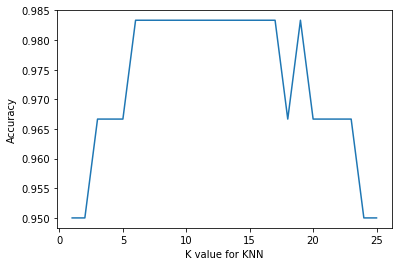

In [10]:
# Plot relationship with matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("K value for KNN")
plt.ylabel("Accuracy")

- Training Accuracy rises as Model Complexity increases
- Testing Accuracy decreases if Model is too complex or not complex enough
- KNN Model: low value of K = more complex

<hr>

## Predict on out-of-sample Data
- After choosing the best Model, Train on the whole training set
- Choosing K = 11, based on the best scores

In [11]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)

knn.predict([[3,5,4,2]])

array([1])